In [1]:
import os
import json
import pandas as pd
import numpy as np

import spacy
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load the spaCy model
nlp = spacy.load('de_core_news_md')

# Define the directory containing the JSON files
corpus_directory = 'corpus_finished'

# Initialize lists to store the data
titles = []
categories = []
genders = []
authors = []
poems = []
line_data = []

# Iterate over the JSON files
for file_name in os.listdir(corpus_directory):
    with open(os.path.join(corpus_directory, file_name), 'r', encoding='utf-8') as file:
        data = json.load(file)

    # Extract the data from the JSON
    titles.append(data['title'])
    categories.append(data['categories'])
    genders.append(data['gender'])
    authors.append(data['author'])
    
    poem_lines = [line_info['text'] for line_info in data['poem'].values() if 'text' in line_info]
    poems.append(' '.join(poem_lines))
    line_data.append(poem_lines)

# Tokenize the poem using spaCy
tokenized_poems = []
for poem in poems:
    doc = nlp(poem)
    tokens = [token.text for token in doc]
    tokenized_poems.append(tokens)

# Create a DataFrame
df = pd.DataFrame({
    'title': titles,
    'categories': categories,
    'gender': genders,
    'author': authors,
    'poem': poems,
    'line_data': line_data,
    'tokenized_poem': tokenized_poems
})
df['num_tokens'] = df['tokenized_poem'].apply(lambda x: len(x))
df['avg_verse_length'] = [np.mean([len(line) for line in entry]) for entry in df['line_data']]

df


,title,categories,gender,author,poem,line_data,tokenized_poem,num_tokens,avg_verse_length
0,125-episoden-imonki-16200,"[Leben & Beziehungen, Ehe, Verlust & Trennung,...",m,Alexandru Bulucz,125 Episoden Monk . In Worten: einhundertfünfu...,"[125 Episoden, Monk, . In Worten: einhundertfü...","[125, Episoden, Monk, ., In, Worten, :, einhun...",657,68.729167
1,aber-wir-werden-durch-den-abend-11566,[Leben & Beziehungen],m,Michael Donhauser,Aber wir werden durch den Abend ewige Gebärde ...,"[Aber wir werden, durch den Abend, ewige Gebär...","[Aber, wir, werden, durch, den, Abend, ewige, ...",39,14.400000
2,alemannische-mangos-15731,"[Natur, Pflanzen]",w,Marie T. Martin,Wenn die Zweige zum Boden geneigt sind kannst ...,[Wenn die Zweige zum Boden geneigt sind kannst...,"[Wenn, die, Zweige, zum, Boden, geneigt, sind,...",159,55.176471
3,alles-was-wir-tun-ist-musik-john-cage-13426,"[Musik, Popkultur, Natur, Pflanzen]",m,Volker Sielaff,Der Regentag bietet sich an gebietet sich der ...,[Der Regentag bietet sich an gebietet sich der...,"[Der, Regentag, bietet, sich, an, gebietet, si...",100,53.250000
4,alp-11834,"[Humoristische Poesie, Leben & Beziehungen]",m,Steffen Jacobs,Wir sind der Welt aufs Dach gestiegen. Die Aus...,"[Wir sind der Welt, aufs Dach gestiegen. Die, ...","[Wir, sind, der, Welt, aufs, Dach, gestiegen, ...",58,21.083333
...,...,...,...,...,...,...,...,...,...
226,wolkenformeln-13978,"[Dichtung, Natur, Sommer, Winter, Landschaft]",m,Jan Volker Röhnert,"Die Träume des Himmels, sagtest du im Schlaf, ...","[Die Träume des Himmels, sagtest du im Schlaf,...","[Die, Träume, des, Himmels, ,, sagtest, du, im...",545,40.152778
227,wyoming-13239,"[Identität (Individuum), Religion / Spirituali...",m,Mirko Bonné,"Wenn wir über die Wäldergrenze hinausgingen, i...","[Wenn wir über die Wäldergrenze hinausgingen,,...","[Wenn, wir, über, die, Wäldergrenze, hinausgin...",155,50.375000
228,zersprengte-neuigkeiten-14345,"[Leben & Beziehungen, Sprache]",m,Alexander Gumz,"ich bin wütend auf sprache, auf alles, was mit...","[ich bin wütend auf sprache, auf alles,, was m...","[ich, bin, wütend, auf, sprache, ,, auf, alles...",137,51.214286
229,zwangsmittel-12267,"[Medizin & Naturwissenschaft, Natur]",m,Léonce W. Lupette,Nicht nur der Paraguayjasmin zittert eine olfa...,"[Nicht nur, der Paraguayjasmin zittert, eine o...","[Nicht, nur, der, Paraguayjasmin, zittert, ein...",194,21.192982


In [3]:
df['poem'].iloc[1]

'Aber wir werden durch den Abend ewige Gebärde leicht bewahren erahnte Sterne Denn es waren Tage im Licht und wir lagen gaben uns selig fremde Namen Nannten den Abend nannten uns leise werden versiegen sanft und bleiben wie berührt'

In [4]:
def get_unique_categories(df):
    unique_categories = set()
    for category_list in df['categories']:
        unique_categories.update(category_list)
    return list(unique_categories)


In [5]:
def count_unique_categories(df, gender='both'):
    if gender == 'both':
        category_counts = df['categories'].explode().value_counts()
    else:
        filtered_df = df[df['gender'] == gender]
        category_counts = filtered_df['categories'].explode().value_counts()
    
    return category_counts


In [6]:
def category_counts_by_gender(df, gender):
    if gender not in ['w', 'm']:
        raise ValueError("Invalid gender value. Please provide 'w' or 'm'.")
    
    category_counts = df[df['gender'] == gender]['categories'].explode().value_counts()
    return category_counts

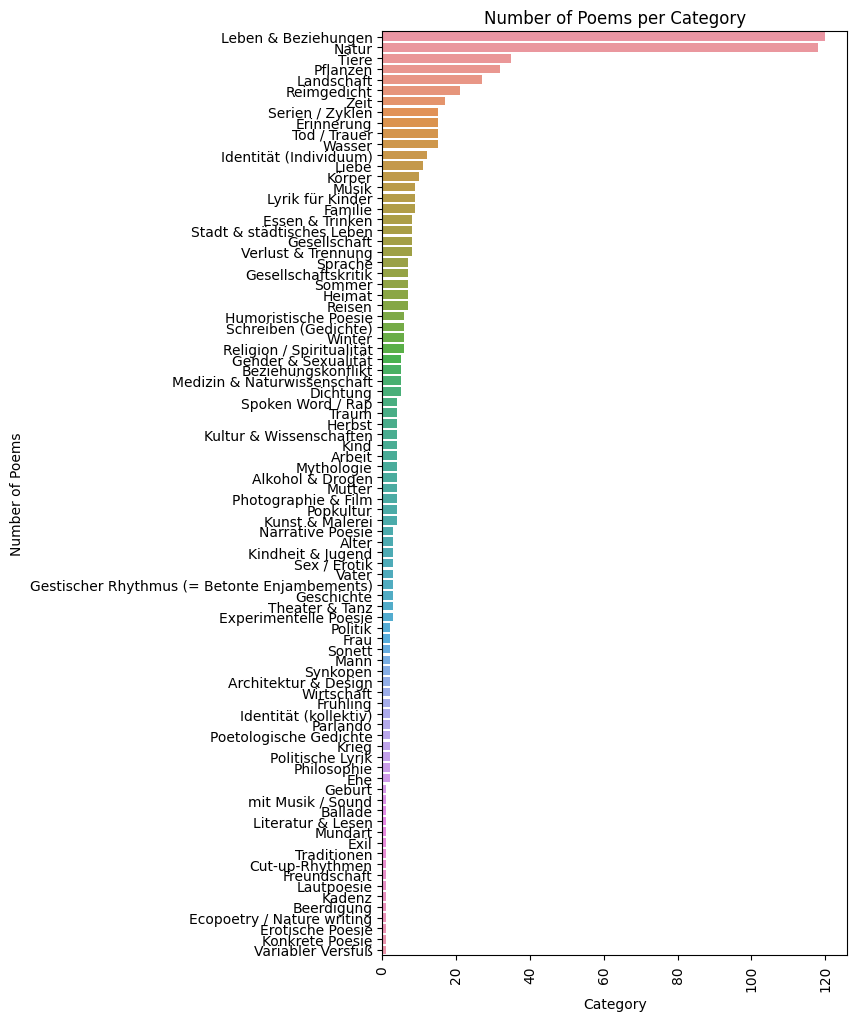

In [7]:
category_counts = df['categories'].explode().value_counts()
plt.figure(figsize=(6, 12))
sns.barplot(x=category_counts.values, y=category_counts.index)
plt.xlabel('Category')
plt.ylabel('Number of Poems')
plt.title('Number of Poems per Category')
plt.xticks(rotation=90)
plt.show()

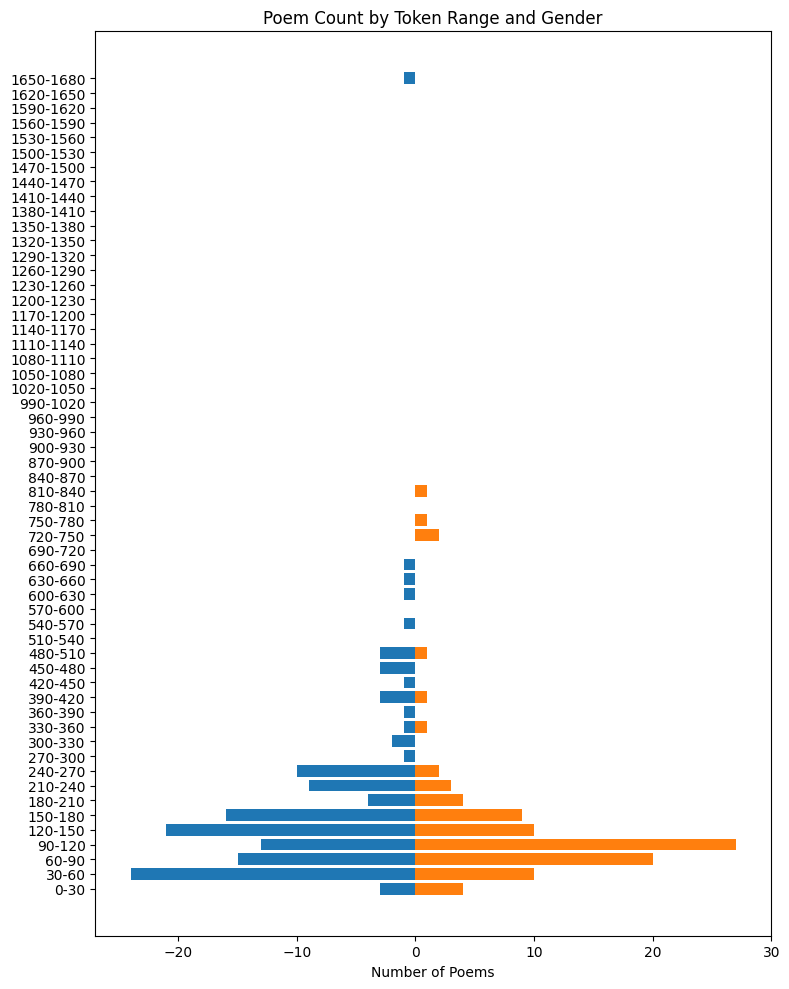

In [8]:
# Define the token range intervals
num_tokens_m = df.loc[df['gender'] == 'm', 'num_tokens']
num_tokens_w = df.loc[df['gender'] == 'w', 'num_tokens']
token_intervals = np.arange(0, max(max(num_tokens_m), max(num_tokens_w))+30, 30)

# Group the indices based on token ranges
indices_m_grouped = [np.where((num_tokens_m >= token_intervals[i]) & (num_tokens_m < token_intervals[i+1]))[0] for i in range(len(token_intervals) - 1)]
indices_w_grouped = [np.where((num_tokens_w >= token_intervals[i]) & (num_tokens_w < token_intervals[i+1]))[0] for i in range(len(token_intervals) - 1)]

# Count the number of poems in each token range
counts_m = [len(indices) for indices in indices_m_grouped]
counts_w = [len(indices) for indices in indices_w_grouped]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 10))

# Plot the number of poems for 'm' on the left side
ax.barh(range(len(counts_m)), -np.array(counts_m), color='tab:blue', align='center')

# Plot the number of poems for 'w' on the right side
ax.barh(range(len(counts_w)), np.array(counts_w), color='tab:orange', align='center')

# Set y-axis tick positions and labels
yticks = range(len(token_intervals) - 1)
yticklabels = [f"{token_intervals[i]}-{token_intervals[i+1]}" for i in range(len(token_intervals) - 1)]
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)

# Set x-axis label and title
ax.set_xlabel('m - Number of Poems - f')
ax.set_title('Poem Count by Token Range and Gender')

# Set the x-axis limits based on the maximum number of poems
ax.set_xlim(-max(counts_m) - 3, max(counts_w) + 3)
plt.tight_layout()

# Show the plot
plt.show()


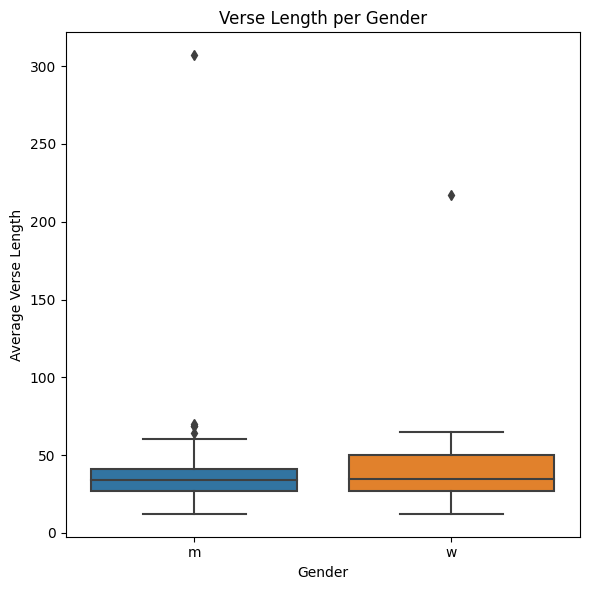

In [9]:
fig, ax = plt.subplots(figsize=(6, 6))

# Plot verse length per gender
sns.boxplot(x='gender', y='avg_verse_length', data=df, ax=ax)

# Set labels and title
ax.set_xlabel('Gender')
ax.set_ylabel('Average Verse Length')
ax.set_title('Verse Length per Gender')

# Show the plot
plt.tight_layout()
plt.show()

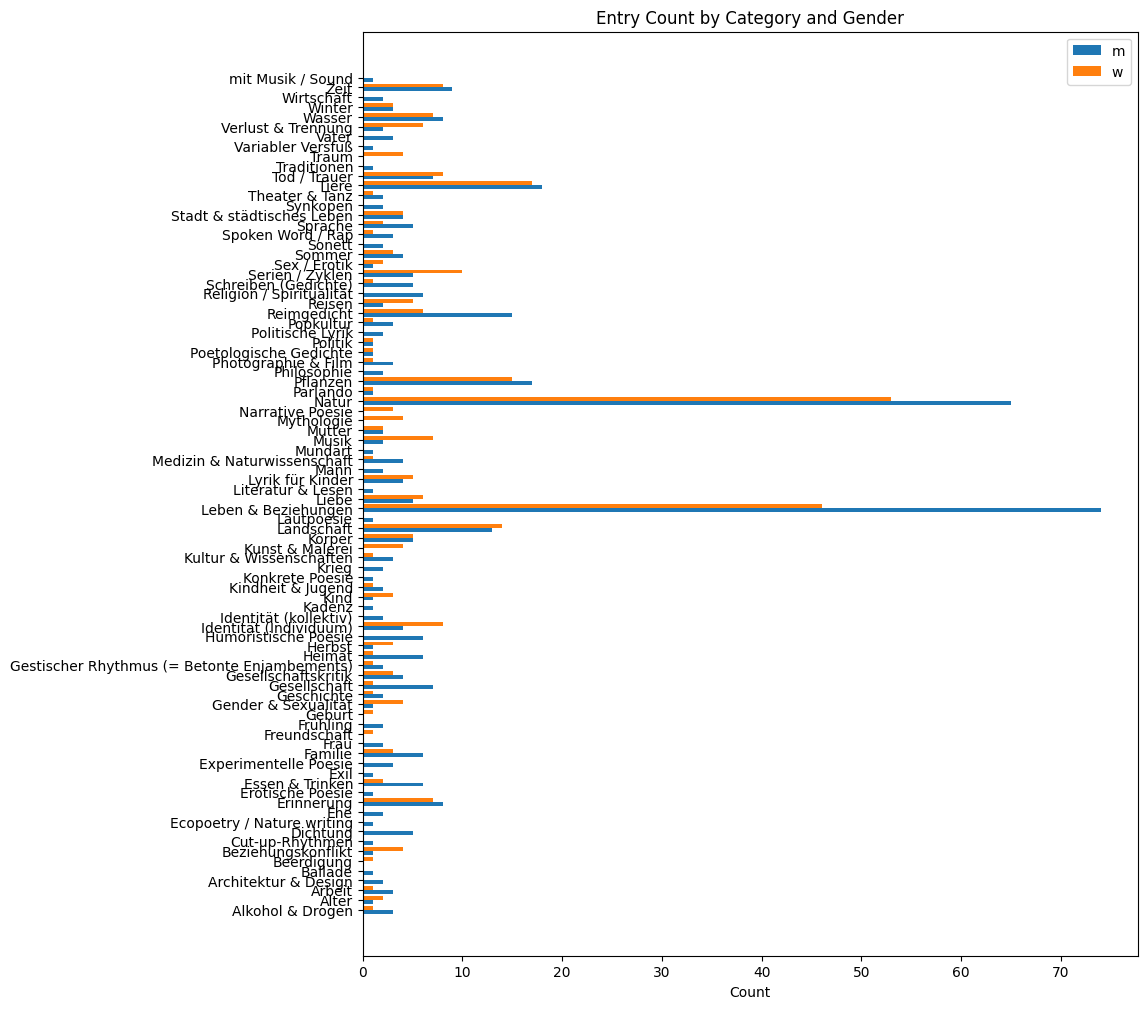

In [15]:
# Get unique categories
categories = sorted(set(category for categories in df['categories'] for category in categories))

# Initialize counts for 'm' and 'w' with zeros for all categories
counts_m = np.zeros(len(categories))
counts_w = np.zeros(len(categories))

# Calculate counts for gender 'm'
for idx, row in df[df['gender'] == 'm'].iterrows():
    for category in row['categories']:
        counts_m[categories.index(category)] += 1

# Calculate counts for gender 'w'
for idx, row in df[df['gender'] == 'w'].iterrows():
    for category in row['categories']:
        counts_w[categories.index(category)] += 1

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 12))

# Set the bar width
bar_width = 0.4

# Plot the counts for 'm' on the left side
ax.barh(np.arange(len(categories)) - bar_width/2, counts_m, height=bar_width, color='tab:blue', label='m')

# Plot the counts for 'w' on the right side
ax.barh(np.arange(len(categories)) + bar_width/2, counts_w, height=bar_width, color='tab:orange', label='w')

# Set y-axis tick positions and labels
ax.set_yticks(np.arange(len(categories)))
ax.set_yticklabels(categories)

# Set x-axis label and title
ax.set_xlabel('Count')
ax.set_title('Entry Count by Category and Gender')

# Add legend
ax.legend()

# Show the plot
plt.show()


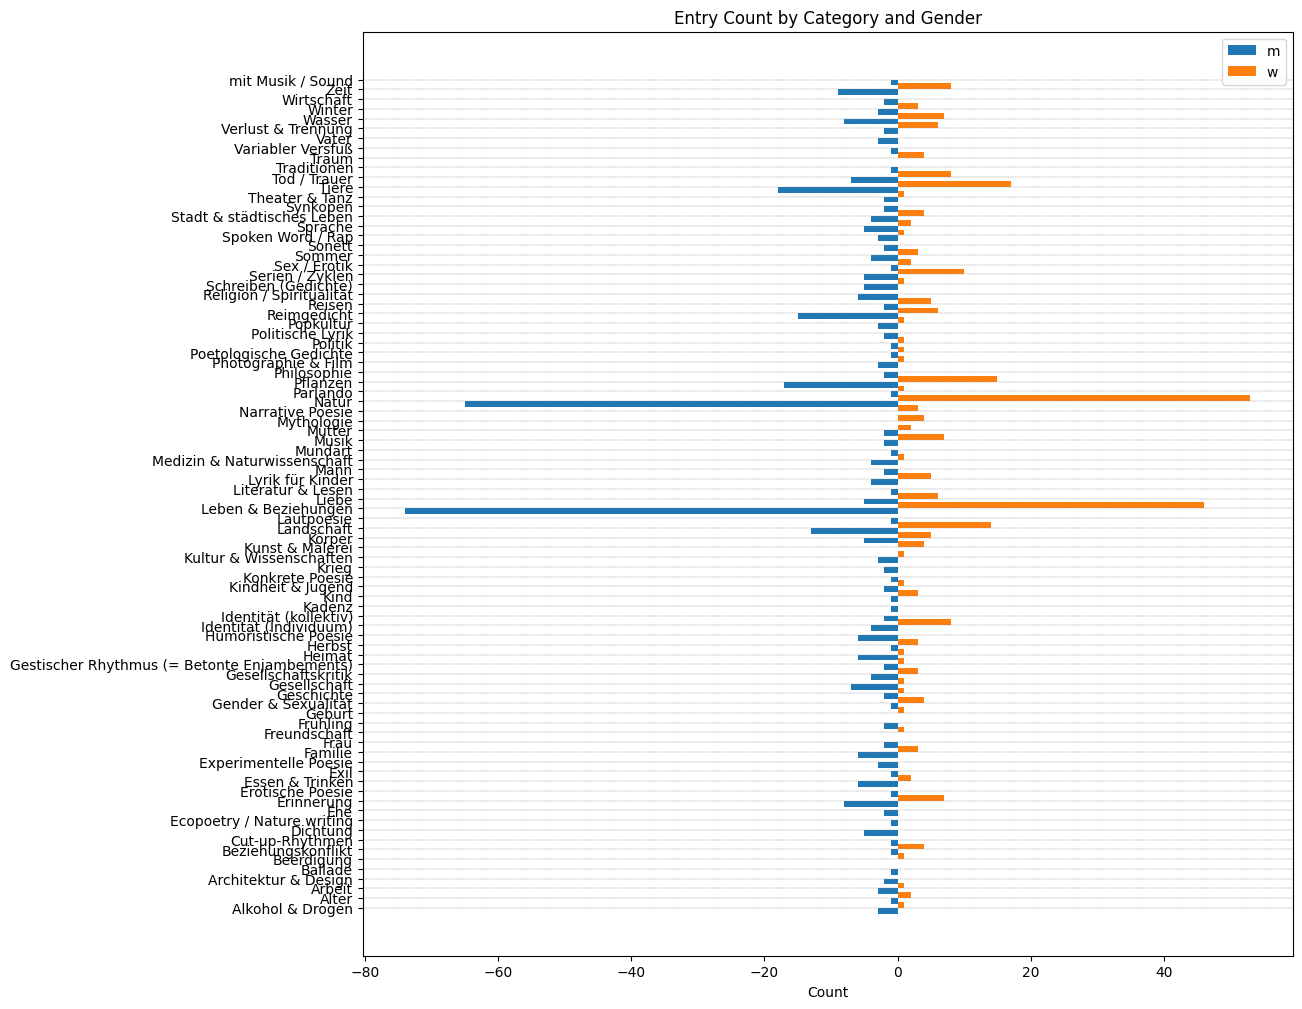

In [11]:
# Get unique categories
categories = sorted(set(category for categories in df['categories'] for category in categories))

# Initialize counts for 'm' and 'w' with zeros for all categories
counts_m = np.zeros(len(categories))
counts_w = np.zeros(len(categories))

# Calculate counts for gender 'm'
for idx, row in df[df['gender'] == 'm'].iterrows():
    for category in row['categories']:
        counts_m[categories.index(category)] += 1

# Calculate counts for gender 'w'
for idx, row in df[df['gender'] == 'w'].iterrows():
    for category in row['categories']:
        counts_w[categories.index(category)] += 1

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 12))
bar_width = 0.6

# Set the positions of the bars
bar_positions_m = np.arange(len(categories)) - bar_width/2
bar_positions_w = np.arange(len(categories)) + bar_width/2

# Plot the counts for 'm' on the left side
ax.barh(bar_positions_m, -counts_m, height=bar_width, color='tab:blue', label='m')

# Plot the counts for 'w' on the right side
ax.barh(bar_positions_w, counts_w, height=bar_width, color='tab:orange', label='w')

# Set y-axis tick positions and labels
ax.set_yticks(np.arange(len(categories)))
ax.set_yticklabels(categories)

# Set x-axis label and title
ax.set_xlabel('Count')
ax.set_title('Entry Count by Category and Gender')

# Add horizontal lines for each y-tick
for y in range(len(categories)):
    plt.axhline(y, color='gray', linestyle='--', linewidth=0.3)

# Add legend
ax.legend()

# Show the plot
plt.show()


In [12]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)